In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data =pd.read_csv('loans.csv')

# Get a feel of the data

In [3]:
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0


In [4]:
data.describe()

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
count,500000.000000,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,4.999890e+05,4.999890e+05,4.999890e+05,4.999890e+05,499989.000000,500000.000000,500000.000000
mean,208928.520236,37.999568,1.279290,4.781061,89.711334,0.000004,1.535980e+04,1.190511e+04,1.009236e+05,1.018893e+05,586.127537,9155.098668,0.023830
std,120648.505833,10.986557,0.448664,0.910897,33.675991,0.002828,3.584068e+04,5.380335e+04,7.665491e+05,7.765588e+05,109.543161,16812.813799,0.152519
min,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,-4.523452e+06,0.000000e+00,0.000000e+00,0.000000,100.000000,0.000000
25%,104443.750000,30.000000,1.000000,4.000000,65.000000,0.000000,0.000000e+00,7.661200e+02,1.186523e+04,1.109770e+04,547.000000,2000.000000,0.000000
50%,209088.500000,36.000000,1.000000,5.000000,96.000000,0.000000,0.000000e+00,2.819820e+03,1.939200e+04,1.861900e+04,603.000000,4900.000000,0.000000
75%,313030.250000,44.000000,2.000000,5.000000,116.000000,0.000000,2.076600e+04,7.417820e+03,3.872886e+04,3.740300e+04,653.000000,9900.000000,0.000000
max,418241.000000,118.000000,3.000000,8.000000,144.000000,2.000000,2.186055e+06,5.705195e+06,9.747924e+07,9.467495e+07,747.000000,200000.000000,1.000000


In [5]:
data.dtypes

Customer_WID           int64
DisbursementDate      object
Age                  float64
CustomerType         float64
SOR                  float64
MonthsSinceOpen      float64
MonthsSinceActive    float64
FinancialMeasure1    float64
FinancialMeasure2    float64
FinancialMeasure3    float64
FinancialMeasure4    float64
CRBScore             float64
Amount               float64
Default                int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
Customer_WID         500000 non-null int64
DisbursementDate     500000 non-null object
Age                  499989 non-null float64
CustomerType         499989 non-null float64
SOR                  499989 non-null float64
MonthsSinceOpen      499989 non-null float64
MonthsSinceActive    499989 non-null float64
FinancialMeasure1    499989 non-null float64
FinancialMeasure2    499989 non-null float64
FinancialMeasure3    499989 non-null float64
FinancialMeasure4    499989 non-null float64
CRBScore             499989 non-null float64
Amount               500000 non-null float64
Default              500000 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 53.4+ MB


# FEATURE ENGINEERING

Dealing with missing values

In [8]:
data.isnull().sum()

Customer_WID          0
DisbursementDate      0
Age                  11
CustomerType         11
SOR                  11
MonthsSinceOpen      11
MonthsSinceActive    11
FinancialMeasure1    11
FinancialMeasure2    11
FinancialMeasure3    11
FinancialMeasure4    11
CRBScore             11
Amount                0
Default               0
dtype: int64

In [10]:
# drop rows with missing values
data= data.dropna(axis=0)

In [11]:
data.describe()

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
count,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,4.999890e+05,4.999890e+05,4.999890e+05,4.999890e+05,499989.000000,499989.000000,499989.000000
mean,208930.517313,37.999568,1.279290,4.781061,89.711334,0.000004,1.535980e+04,1.190511e+04,1.009236e+05,1.018893e+05,586.127537,9153.715950,0.023831
std,120648.290434,10.986557,0.448664,0.910897,33.675991,0.002828,3.584068e+04,5.380335e+04,7.665491e+05,7.765588e+05,109.543161,16807.781322,0.152521
min,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,-4.523452e+06,0.000000e+00,0.000000e+00,0.000000,100.000000,0.000000
25%,104449.000000,30.000000,1.000000,4.000000,65.000000,0.000000,0.000000e+00,7.661200e+02,1.186523e+04,1.109770e+04,547.000000,2000.000000,0.000000
50%,209089.000000,36.000000,1.000000,5.000000,96.000000,0.000000,0.000000e+00,2.819820e+03,1.939200e+04,1.861900e+04,603.000000,4900.000000,0.000000
75%,313031.000000,44.000000,2.000000,5.000000,116.000000,0.000000,2.076600e+04,7.417820e+03,3.872886e+04,3.740300e+04,653.000000,9900.000000,0.000000
max,418241.000000,118.000000,3.000000,8.000000,144.000000,2.000000,2.186055e+06,5.705195e+06,9.747924e+07,9.467495e+07,747.000000,200000.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499989 entries, 0 to 499999
Data columns (total 14 columns):
Customer_WID         499989 non-null int64
DisbursementDate     499989 non-null object
Age                  499989 non-null float64
CustomerType         499989 non-null float64
SOR                  499989 non-null float64
MonthsSinceOpen      499989 non-null float64
MonthsSinceActive    499989 non-null float64
FinancialMeasure1    499989 non-null float64
FinancialMeasure2    499989 non-null float64
FinancialMeasure3    499989 non-null float64
FinancialMeasure4    499989 non-null float64
CRBScore             499989 non-null float64
Amount               499989 non-null float64
Default              499989 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 57.2+ MB


In [13]:
#data['Default']=data['Default'].astype('float')

In [14]:
data=data[['Customer_WID','Age','CustomerType','SOR','MonthsSinceOpen','MonthsSinceActive','FinancialMeasure1','FinancialMeasure2','FinancialMeasure3','FinancialMeasure4','CRBScore','Amount','Default']]
data

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
0,380415,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0
1,153249,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0
2,82776,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0
3,190996,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0
4,375566,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,171101,38.0,1.0,5.0,105.0,0.0,0.0,4.07,13524.66,6515.0,570.0,4800.0,0
499996,253792,56.0,1.0,5.0,141.0,0.0,0.0,349.92,18325.90,23619.8,662.0,2000.0,0
499997,42382,30.0,2.0,5.0,118.0,0.0,0.0,6175.33,54400.00,51200.0,635.0,15000.0,0
499998,148937,28.0,1.0,3.0,45.0,0.0,0.0,2063.75,5506.66,5840.0,603.0,530.0,0


drop unnecessary column

In [15]:
data = data.drop(['Customer_WID'] ,axis =1)

# Poportion of defaults vs nondefaults

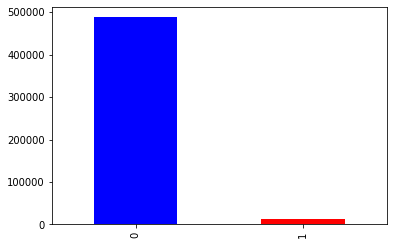

In [16]:
#proportion of defaults vs nondefaults
my_colors = ('b', 'r', 'g', 'y', 'k')
data['Default'].value_counts().plot(kind='bar', stacked=True, color=my_colors)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


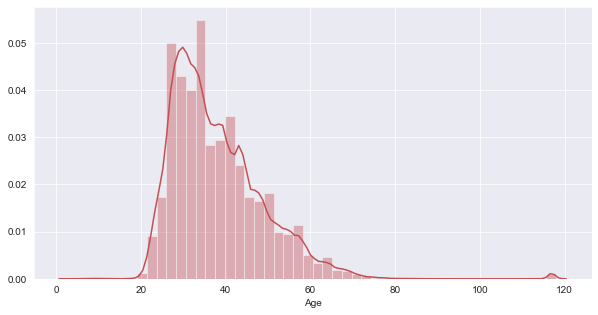

In [17]:
#the frequency of taking loans considering ages
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.set_color_codes()
sns.distplot(data['Age'].astype(int), color = 'r')

# Amount of loan taken at each age group and proportion that was defaulted

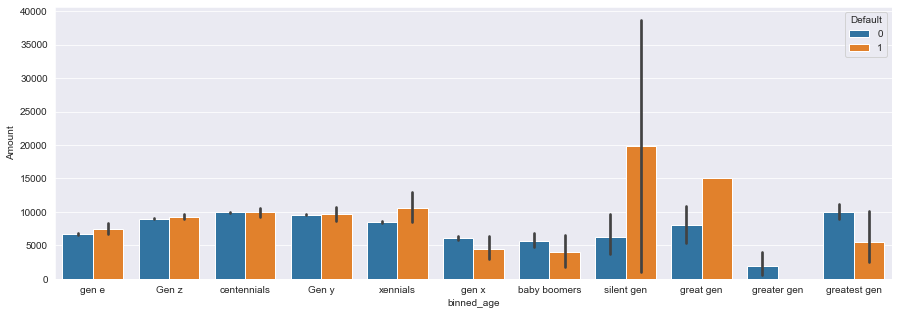

In [18]:
#amount of loan taken at each age group and proportion that was defaulted
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
rotation = 90
data['binned_age'] = pd.cut(data['Age'], bins = [15,25,35,45,55,65,75,85,95,105,115,125],labels= ['gen e','Gen z', 'centennials', 'Gen y' ,'xennials' ,'gen x', 'baby boomers', 'silent gen', 'great gen','greater gen','greatest gen'])
sns.set_style('darkgrid')
sns.barplot(x = data['binned_age'] , y = data['Amount'], hue = data['Default'])

In [19]:
data['CRBScore'].max()

747.0

In [20]:
# data['binned_crb'] = pd.cut(data['CRBScore'], bins = [0,100,200,300,400,500,600,700,800],labels= ['ext_low','lowest','lower', 'low','middle', 'high','higher','highest'])
# sns.set_style('darkgrid')
# plt.figure(figsize=(15,5))
# sns.barplot(x = data['binned_crb'] , y = data['Amount'], hue = data['Default'])

In [21]:
data.head()

,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,binned_age
0,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,Gen z
1,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,Gen y
2,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,centennials
3,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,Gen z
4,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,centennials


# bar graphs showing the proportion of each class in SOR, CustomerType and Binned_age

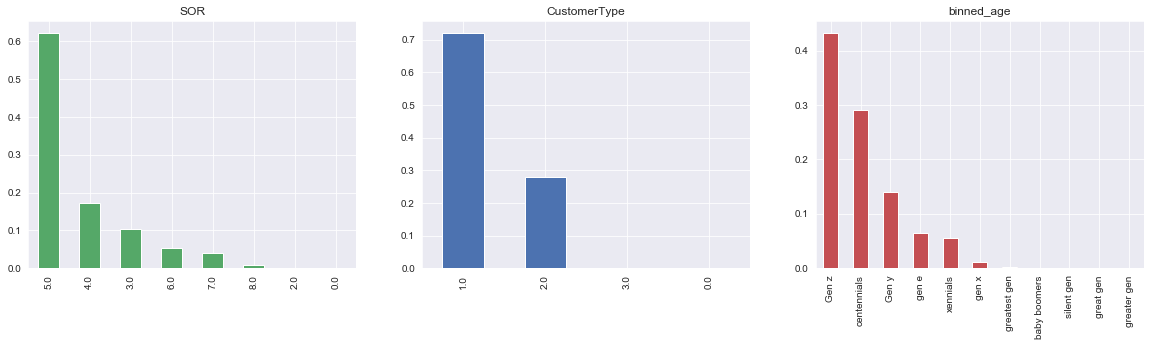

In [22]:
plt.subplot(231)
data['SOR'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'SOR', color='g')

plt.subplot(232)
data['CustomerType'].value_counts(normalize=True).plot.bar(title= 'CustomerType', color = 'b')

plt.subplot(233)
data['binned_age'].value_counts(normalize=True).plot.bar(title= 'binned_age', color = 'r')


plt.show()

# average loan taken by each group of SOR and proportion that defaulted

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


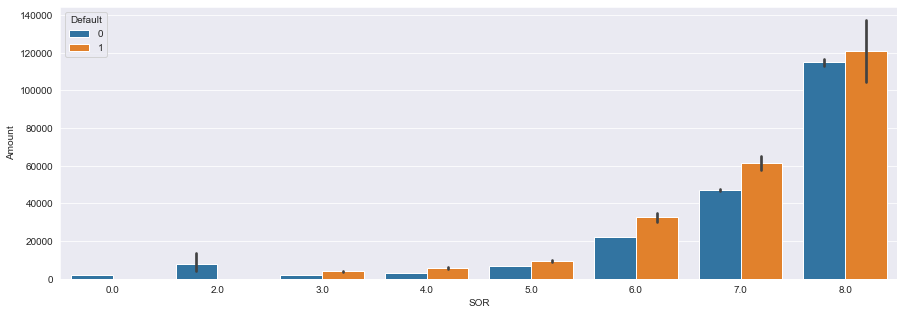

In [23]:


plt.figure(figsize=(15,5))
sns.barplot(x = data['SOR'] , y = data['Amount'] , hue = data['Default'], )

# average loan taken by each group of CustomerType and proportion that defaulted

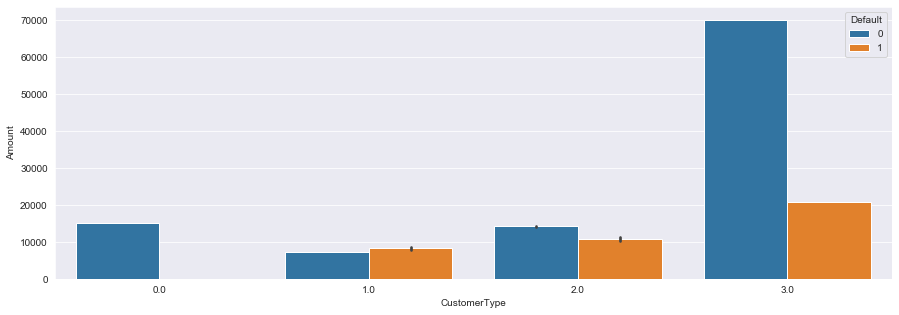

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x = data['CustomerType'] , y = data['Amount'] , hue = data['Default'], )

In [25]:
# data['binned_amount'] = pd.cut(data['Amount'], bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000],labels= ['ext_low','lowest','lower', 'low','middle','mid', 'high','higher','highest','ext_high'])

In [26]:
data.head(5)

,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,binned_age
0,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,Gen z
1,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,Gen y
2,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,centennials
3,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,Gen z
4,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,centennials


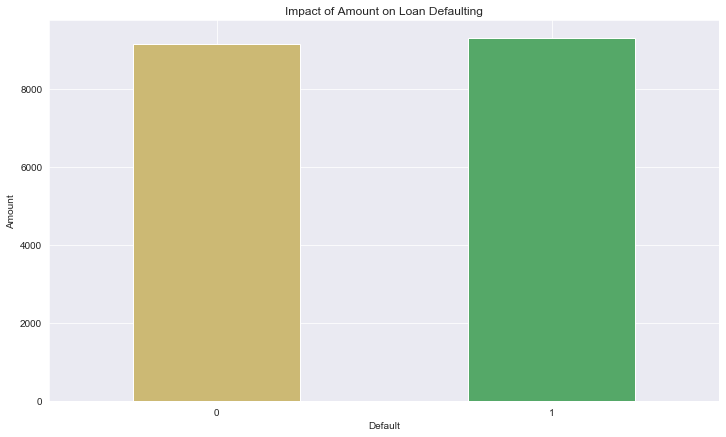

In [27]:
Amount_pivot =data.pivot_table(index='Default', values="Amount", aggfunc=np.mean)
Amount_pivot.plot(kind='bar', color=('y','g','r',),figsize=(12,7))
plt.xlabel("Default")
plt.ylabel("Amount")
plt.legend().set_visible(False)
plt.title("Impact of Amount on Loan Defaulting")
#plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.6), shadow=True, ncol=1)
plt.xticks(rotation=0)
plt.show()

In [28]:
# Box Plot for variable Amount of training data set

#data.boxplot(column='Amount')

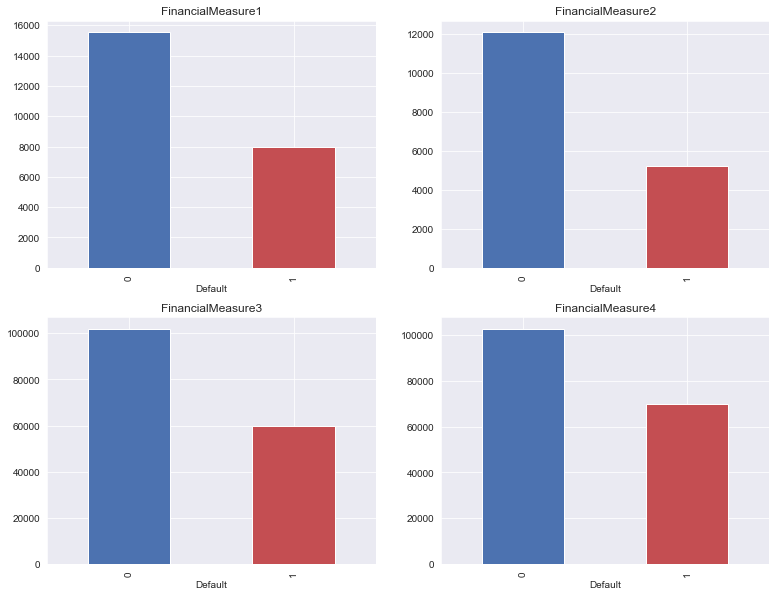

In [29]:
#relation of  to financial measures to defaulting
my_colors = ('b', 'r', 'g', 'y', 'k')
plt.subplot(231)
data.groupby('Default')['FinancialMeasure1'].mean().plot(kind='bar', figsize=(20,10), stacked=True, color=my_colors,title= 'FinancialMeasure1')

plt.subplot(232)
data.groupby('Default')['FinancialMeasure2'].mean().plot(kind='bar', stacked=True, color=my_colors, title= 'FinancialMeasure2')

plt.subplot(234)
data.groupby('Default')['FinancialMeasure3'].mean().plot(kind='bar', stacked=True, color=my_colors, title= 'FinancialMeasure3')

plt.subplot(235)
data.groupby('Default')['FinancialMeasure4'].mean().plot(kind='bar', stacked=True, color=my_colors, title= 'FinancialMeasure4')

In [30]:
data

,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,binned_age
0,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,Gen z
1,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,Gen y
2,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,centennials
3,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,Gen z
4,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,centennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,38.0,1.0,5.0,105.0,0.0,0.0,4.07,13524.66,6515.0,570.0,4800.0,0,centennials
499996,56.0,1.0,5.0,141.0,0.0,0.0,349.92,18325.90,23619.8,662.0,2000.0,0,xennials
499997,30.0,2.0,5.0,118.0,0.0,0.0,6175.33,54400.00,51200.0,635.0,15000.0,0,Gen z
499998,28.0,1.0,3.0,45.0,0.0,0.0,2063.75,5506.66,5840.0,603.0,530.0,0,Gen z


In [31]:
# data['binned_mthopen'] = pd.cut(data['Amount'], bins = [0,12,24,36,48,60,72,84,96,108,120,132,144],labels= ['1yr','2yr','3yr','4yr','5yr','6yr','7yr','8yr','9yr','10yr','11yr','12yr'])
# data.head()

# Defaulting in relation to CRBScore

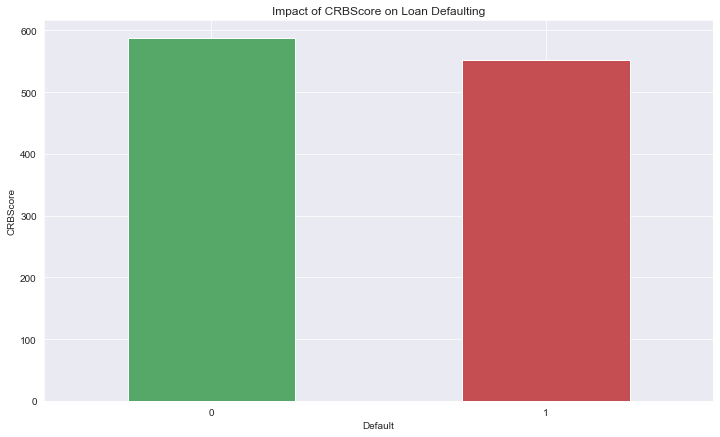

In [32]:
CRB_pivot =data.pivot_table(index='Default', values="CRBScore", aggfunc=np.mean)
CRB_pivot.plot(kind='bar', color=('g','r','k',),figsize=(12,7))
plt.xlabel("Default")
plt.ylabel("CRBScore")
plt.legend().set_visible(False)
plt.title("Impact of CRBScore on Loan Defaulting")
#plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.6), shadow=True, ncol=1)
plt.xticks(rotation=0)
plt.show()

# MonthsSinceOpen MonthsSinceActive in relation to defaulting

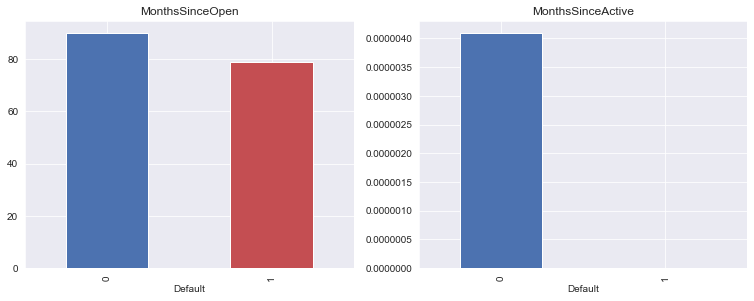

In [33]:
#MonthsSinceOpen MonthsSinceActive in relation to defaulting
my_colors = ('b', 'r', 'g', 'y', 'k')
plt.subplot(231)
data.groupby('Default')['MonthsSinceOpen'].mean().plot(kind='bar', figsize=(20,10), stacked=True, color=my_colors,title= 'MonthsSinceOpen')

plt.subplot(232)
data.groupby('Default')['MonthsSinceActive'].mean().plot(kind='bar', stacked=True, color=my_colors, title= 'MonthsSinceActive')


# every age group in relation to defaulting loan

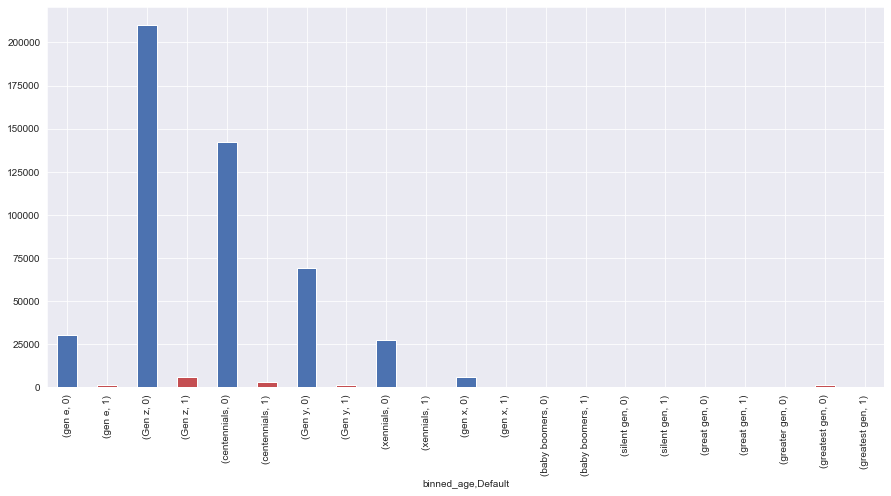

In [34]:
# every age group in relation to defaulting loan
my_colors = ('b', 'r')
data.groupby('binned_age')['Default'].value_counts().plot(kind='bar', stacked=True, figsize=(15,7) , color = my_colors)

In [35]:
# # Histogram of CRBScore

# data['CRBScore'].hist(bins=50,color = 'y' , figsize=(15,5))
# plt.title('CRBScore Histogram')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()



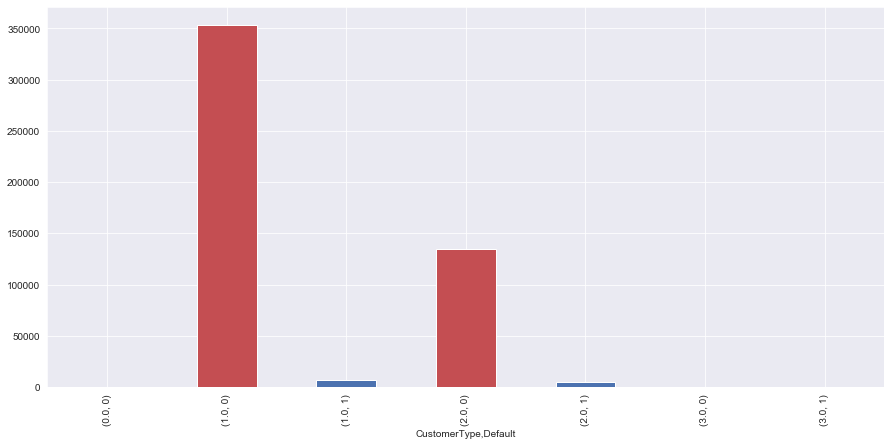

In [36]:
#CustomerType	SOR
my_colors = ('b', 'r')
data.groupby('CustomerType')['Default'].value_counts().plot(kind='bar', stacked=True, figsize=(15,7) , color = my_colors)

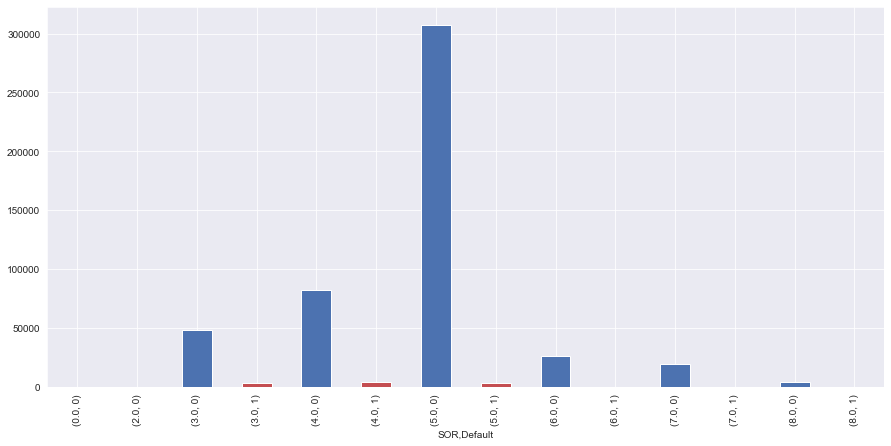

In [37]:
#CustomerType	SOR
my_colors = ('b', 'r')
data.groupby('SOR')['Default'].value_counts().plot(kind='bar', stacked=True, figsize=(15,7) , color = my_colors)

In [38]:
data.columns

Index(['Age', 'CustomerType', 'SOR', 'MonthsSinceOpen', 'MonthsSinceActive',
       'FinancialMeasure1', 'FinancialMeasure2', 'FinancialMeasure3',
       'FinancialMeasure4', 'CRBScore', 'Amount', 'Default', 'binned_age'],
      dtype='object')

In [40]:
#make a column for each categorical data
# Select the categorical columns
categorical_subset = data[['binned_age']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

data.drop(labels=['binned_age'], axis=1, inplace=True)
data = pd.concat([data, categorical_subset], axis = 1)

In [41]:
data.columns

Index(['Age', 'CustomerType', 'SOR', 'MonthsSinceOpen', 'MonthsSinceActive',
       'FinancialMeasure1', 'FinancialMeasure2', 'FinancialMeasure3',
       'FinancialMeasure4', 'CRBScore', 'Amount', 'Default',
       'binned_age_gen e', 'binned_age_Gen z', 'binned_age_centennials',
       'binned_age_Gen y', 'binned_age_xennials', 'binned_age_gen x',
       'binned_age_baby boomers', 'binned_age_silent gen',
       'binned_age_great gen', 'binned_age_greater gen',
       'binned_age_greatest gen'],
      dtype='object')

In [43]:
y = data['Default']
X = data[['Age', 'CustomerType', 'SOR', 'MonthsSinceOpen', 'MonthsSinceActive',
       'FinancialMeasure1', 'FinancialMeasure2', 'FinancialMeasure3',
       'FinancialMeasure4', 'CRBScore', 'Amount',
       'binned_age_gen e', 'binned_age_Gen z', 'binned_age_centennials',
       'binned_age_Gen y', 'binned_age_xennials', 'binned_age_gen x',
       'binned_age_baby boomers', 'binned_age_silent gen',
       'binned_age_great gen', 'binned_age_greater gen',
       'binned_age_greatest gen']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# from sklearn.linear_model import LogisticRegression
# lm = LogisticRegression()
# y_pred =lm.fit(X_train, y_train)
# print('Coefficients: \n', lm.coef_)
# predictions = lm.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,classification_report

In [46]:
from sklearn.linear_model import LogisticRegression
# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_0 = clf_0.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, pred_y_0))
print ("Recall score   : ", recall_score(pred_y_0,y_test))
confusion_matrix(y_test, pred_y_0)
print ("classification report :\n",classification_report(pred_y_0,y_test))

Accuracy score :  0.9760861883904345
Recall score   :  0.0
classification report :
              precision    recall  f1-score   support

          0       1.00      0.98      0.99    149989
          1       0.00      0.00      0.00         8

avg / total       1.00      0.98      0.99    149997



In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_s = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf_s.fit(X_train, y_train)
clf_rf_pred_s= clf_rf_s.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test, clf_rf_pred_s))
print ("Recall score   : ", recall_score(clf_rf_pred_s,y_test))
confusion_matrix(y_test, clf_rf_pred_s)
print ("classification report :\n",classification_report(clf_rf_pred_s,y_test))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy score :  0.9762261911904905
Recall score   :  0.5488721804511278
classification report :
              precision    recall  f1-score   support

          0       1.00      0.98      0.99    149864
          1       0.02      0.55      0.04       133

avg / total       1.00      0.98      0.99    149997

